In [0]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal

# Model
from keras.models import Sequential

# Layers
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import prettytable as pt

In [5]:
# MNIST Data Fetching and Preprocessing

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert 28*28 image into 784 size 1D tensor
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Convert labels into one-hot encoded vectors

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Normalize the input data using simple min max normalization

X_train = X_train / 255
X_test = X_test / 255

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def plot_dynamic(x, vy, ty, ax, fig, colors=['b']):
    ax.plot(x, vy, 'r', label='Validation Loss')
    ax.plot(x, ty, 'b', label='Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# Plotting Training/Validation Loss

def plot_loss(history):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Softmax Cross Entropy Loss")
    
    x = list(range(1, n_epochs+1))
    vy = history.history['val_loss']
    ty = history.history['loss']
    
    plot_dynamic(x, vy, ty, ax, fig)

In [0]:
'''
def plot_weight_distribution(weights):
    h1 = weights[0].flatten().reshape(-1, 1)
    h2 = weights[2].flatten().reshape(-1, 1)
    out = weights[4].flatten().reshape(-1, 1)
    fig = plt.figure()
    plt.title("Training Weights Distribution")
    
    plt.subplot(1, 3, 1)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h1, color='b')
    plt.xlabel("Layer 1")
    
    plt.subplot(1, 3, 2)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=h2, color='r')
    plt.xlabel("Layer 2")
    
    plt.subplot(1, 3, 3)
    plt.title("Trained Weights")
    ax = sns.violinplot(y=out, color='g')
    plt.xlabel('Out Layer')
    
    plt.show()
'''
# Plot function for weight distribution

def plot_weight_distribution(weights, hidden_layers=None):
    colors = ['b', 'r', 'g', 'y', 'm']
    fig = plt.figure()
    plt.title("Training Weights Distribution")
    
    for i in range(0, hidden_layers+1):
        layer_weights = weights[i*2].flatten().reshape(-1, 1)
        plt.subplot(1, hidden_layers+1, i+1)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=layer_weights, color=colors[i%5])
        if i == hidden_layers:
            plt.xlabel("Out Layer")
        else:
            plt.xlabel("Layer {}".format(i+1))
    plt.show()

In [0]:
# Helper to print results in tabular format

def print_results(data):
    result = pt.PrettyTable(hrules=pt.ALL, 
                       vrules=pt.ALL, padding_width=5)
    result.field_names = list(data.columns)
    for i in range(0, data.shape[0]):
        result.add_row(data.iloc[i])
        #result.align["Vectorizer"] = "l"
    print(result)

In [0]:
results = pd.DataFrame(columns=['Hidden Layers', 'Train Loss', 
                                'Train Accuracy(%)',
                                'Test Loss', 'Test Accuracy(%)'])

In [0]:
# Model Parameters

input_dim = 784
output_dim = 10
batch_size = 100
n_epochs = 20

**MLP (2-hidden layers) + Adam Optimizer + ReLU activations **

In [56]:
# Model Architecture

# Hidden layer 1 --> 256


# Hidden layer 2 --> 64

# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(256, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, 
                                                seed=None)))

# Hidden Layer 2
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))

# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.09670611362971668
Test Accuracy :  0.9787


In [0]:
train_acc = round(history.history['acc'][len(history.history['acc'])-1]*100, 2)
train_loss = round(history.history['loss'][len(history.history['loss'])-1], 6)
test_loss = round(score[0], 6)
test_acc = round(score[1]*100, 2)

results.loc[results.shape[0]] = [2, train_loss, 
                                 train_acc, test_loss, test_acc]

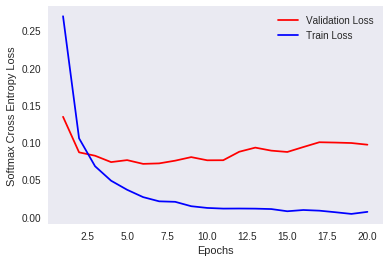

In [67]:
plot_loss(history)

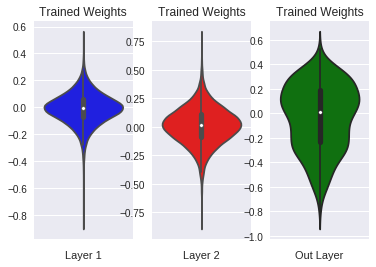

In [68]:
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=2)

**MLP (2-hidden layers) + Adam Optimizer + ReLU activations + BatchNorm + Dropout**

In [69]:
# Model Architecture

# Hidden layer 1 --> 256

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.3

# Hidden layer 2 --> 64

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.3


# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(256, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Hidden Layer 2
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                650       
Total para

In [70]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.0620771082616382
Test Accuracy :  0.9812


In [0]:
train_acc = round(history.history['acc'][len(history.history['acc'])-1]*100, 2)
train_loss = round(history.history['loss'][len(history.history['loss'])-1], 6)
test_loss = round(score[0], 6)
test_acc = round(score[1]*100, 2)

results.loc[results.shape[0]] = [2, train_loss, 
                                 train_acc, test_loss, test_acc]

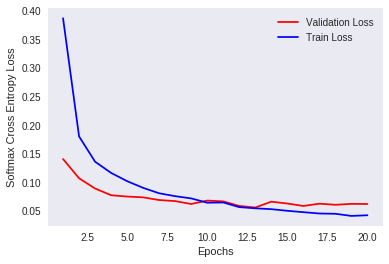

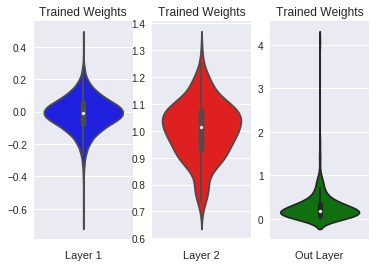

In [72]:
plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=2)

**MLP (3-hidden layers) + Adam Optimizer + ReLU activations **

In [73]:
# Model Architecture

# Hidden layer 1 --> 1024


# Hidden layer 2 --> 512


# Hidden layer 3 --> 256


# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(1024, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))

# Hidden Layer 2
model.add(Dense(512, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))

# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, 
                                                seed=None)))

# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_40 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.08847803688376907
Test Accuracy :  0.9837


In [0]:
train_acc = round(history.history['acc'][len(history.history['acc'])-1]*100, 2)
train_loss = round(history.history['loss'][len(history.history['loss'])-1], 6)
test_loss = round(score[0], 6)
test_acc = round(score[1]*100, 2)

results.loc[results.shape[0]] = [3, train_loss, 
                                 train_acc, test_loss, test_acc]

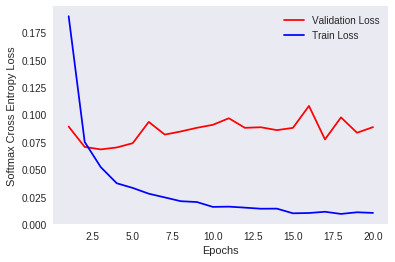

In [76]:
plot_loss(history)

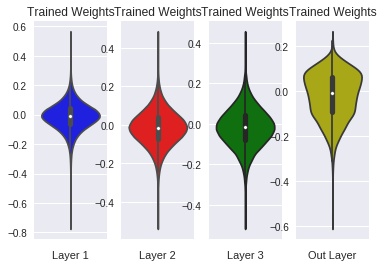

In [77]:
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=3)

**MLP (3-hidden layers) + Adam Optimizer + ReLU activations + BatchNorm + Dropout**

In [78]:
# Model Architecture

# Hidden layer 1 --> 1024

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 2 --> 512

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 3 --> 256

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5


model = Sequential()

# Hidden Layer 1
model.add(Dense(1024, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 2
model.add(Dense(512, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_15 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               131328    
__________

In [79]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.046505835577205286
Test Accuracy :  0.9859


In [0]:
train_acc = round(history.history['acc'][len(history.history['acc'])-1]*100, 2)
train_loss = round(history.history['loss'][len(history.history['loss'])-1], 6)
test_loss = round(score[0], 6)
test_acc = round(score[1]*100, 2)

results.loc[results.shape[0]] = [3, train_loss, 
                                 train_acc, test_loss, test_acc]

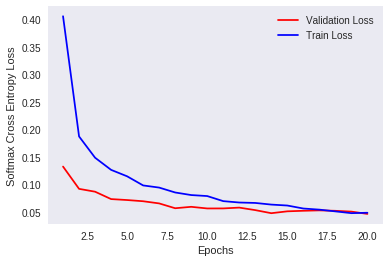

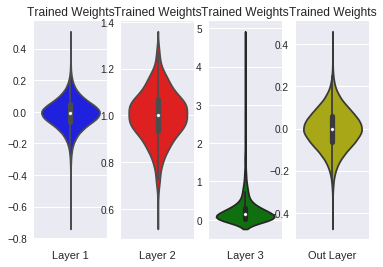

In [81]:
plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=3)

**MLP (5-hidden layers) + Adam Optimizer + ReLU activations**

In [82]:
# Model Architecture

# Hidden layer 1 --> 2048


# Hidden layer 2 --> 1024


# Hidden layer 3 --> 256


# Hidden layer 4 --> 128


# Hidden layer 5 --> 64

# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(2048, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))

# Hidden Layer 2
model.add(Dense(1024, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.031, 
                                                seed=None)))

# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))

# Hidden Layer 4
model.add(Dense(128, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))

# Hidden Layer 5
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, 
                                                seed=None)))

# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_49 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_50 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                650       
Total params: 4,010,058
Trainable params: 4,010,058
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.0808706013785868
Test Accuracy :  0.9853


In [0]:
train_acc = round(history.history['acc'][len(history.history['acc'])-1]*100, 2)
train_loss = round(history.history['loss'][len(history.history['loss'])-1], 6)
test_loss = round(score[0], 6)
test_acc = round(score[1]*100, 2)

results.loc[results.shape[0]] = [5, train_loss, 
                                 train_acc, test_loss, test_acc]

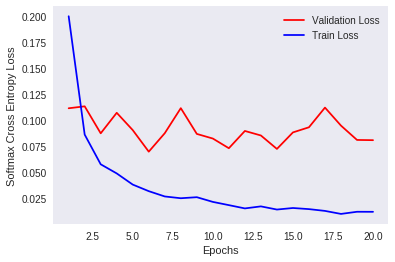

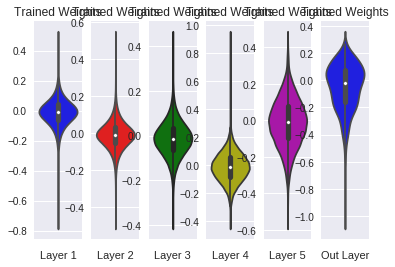

In [85]:
plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=5)

**MLP (5-hidden layers) + Adam Optimizer + ReLU activations + BatchNorm + Dropout**

In [86]:
# Model Architecture

# Hidden layer 1 --> 2048

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 2 --> 1024

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 3 --> 256

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 4 --> 128

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Hidden layer 5 --> 64

# Batch Normalization Layer
# Dropout layer with dropout_rate = 0.5

# Since we are using ReLU activation,
# we will use He-initialization.

model = Sequential()

# Hidden Layer 1
model.add(Dense(2048, input_shape=(input_dim,), activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.050, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 2
model.add(Dense(1024, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.031, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 3
model.add(Dense(256, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.044, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 4
model.add(Dense(128, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Hidden Layer 5
model.add(Dense(64, activation='relu', 
                kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, 
                                                seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


# Output SoftMax Layer
model.add(Dense(output_dim, activation='softmax'))


# Defining optimizer, loss function and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
batch_normalization_18 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_18 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_19 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 256)               262400    
__________

Test Loss :  0.058819297602958974
Test Accuracy :  0.9842


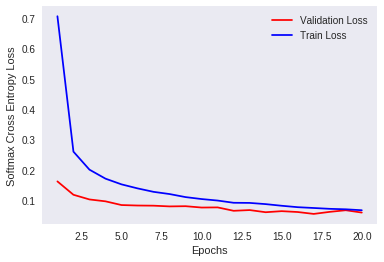

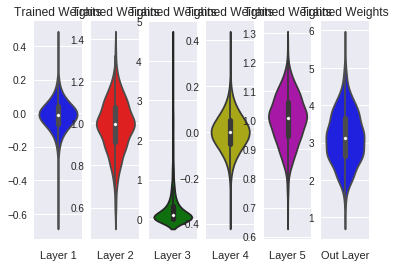

In [87]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                    verbose=0, validation_data=(X_test, y_test))

# Test Loss and Accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

train_acc = round(history.history['acc'][len(history.history['acc'])-1]*100, 2)
train_loss = round(history.history['loss'][len(history.history['loss'])-1], 6)
test_loss = round(score[0], 6)
test_acc = round(score[1]*100, 2)

results.loc[results.shape[0]] = [5, train_loss, 
                                 train_acc, test_loss, test_acc]
plot_loss(history)
weights = model.get_weights()
plot_weight_distribution(weights, hidden_layers=5)

# Results



In [89]:
print_results(results)

+-----------------------+--------------------+---------------------------+-------------------+--------------------------+
|     Hidden Layers     |     Train Loss     |     Train Accuracy(%)     |     Test Loss     |     Test Accuracy(%)     |
+-----------------------+--------------------+---------------------------+-------------------+--------------------------+
|          2.0          |      0.006622      |           99.76           |      0.096706     |          97.87           |
+-----------------------+--------------------+---------------------------+-------------------+--------------------------+
|          2.0          |      0.042406      |           98.63           |      0.062077     |          98.12           |
+-----------------------+--------------------+---------------------------+-------------------+--------------------------+
|          3.0          |      0.010192      |           99.73           |      0.088478     |          98.37           |
+-----------------------

**Observations**



*Tried 3 different MLP architectures on the MNIST data.*



**Common Steps taken for each model :**

a.)   First we define the model architecture. We start by defining a Sequential model using Sequential() function call since data flows 
      sequentially in the network starting from first layer to the end of the output layer. Then we specify the number of layers, number of neurons in         each layer, activation function for each layer and weight initialization scheme for each layer etc. using model.add() function.



   In models where we use Batch Normalization (to avoid covariate shift(input distribution changes)), and Dropout(to add regularization to avoid   overfitting), we add a layer for each using model.add(). For Dropout layer we specify the dropout rate(randomly drop this percentage of connections) as well.



b.)   After specifying the layers, we configure the parameters such as loss function,  optimizer and evaluation metric using model.compile()     function.


c.)  model.summary() gives an overview of the synthesized model.


d.) Then we use model.fit() to train the model on training data. This function also takes the batch_size and number of epochs for which the model is run. Validation data is provided as well and at the end of the run we can check the history object returned by model.fit() to evaluate the train and validation loss/accuracy. This data is used to print train/validation losses against the number of epochs.


e. ) model.evaluate() function is then used to run the model on test data. This function returns the test loss and test accuracy.



f.) model.get_weights() return the weights & biases for the different layers of the network and it is used to plot the pdf's for trained weights at each layer to do a sanity check on weights. This helps in visualizing if the weights are becoming too small or too large which can lead to 
vanishing gradients or exploding gradients problem respectively.


We used ReLU activation units across layers in all architectures and  hence the weights were initialized using He-Normal-initialization. So initial weights for neural units in hidden layers were randomly sampled from distribution with mean 0 and standard deviation of sqrt(2 / (fan_in + 1)) 
where fan_in is incoming connections at each neural unit. Since this is a fully connected network, all neural units in same hidden layer had same fan_in value.


Adam optimizer was used for adaptive learning rate. Categorical cross entropy was used as a loss metric. Accuracy was used as a performance metric.


All models had a softmax layer at the end with 10 neural units since this is  a 10-class classification problem.


Models were run for 20 epochs and batch_size was 100 for each iteration.




**Configuration used for models :**


**Model 1 :**

	Input --> Hidden Layer 1 (256 neurons) --> Hidden Layer 2 (64 neurons) --> softmax layer(10 neurons) --> output


**Model 2 :**

	Input --> Hidden Layer 1 (256 neurons) --> Batch Normalization Layer --> Dropout Layer(drop_rate=0.3) --> Hidden Layer 2 (64 neurons) --> Batch Normalization Layer --> Dropout Layer(drop_rate=0.3) --> softmax layer(10 neurons) --> output



**Model 3 :**

	Input --> Hidden Layer 1 (1024 neurons) --> Hidden Layer 2 (512 neurons) --> Hidden Layer 3 (512 neurons) -->   softmax layer(10 neurons) --> output



**Model 4 :**

	Input --> Hidden Layer 1 (1024 neurons) --> Batch Normalization Layer --> Dropout Layer(drop_rate=0.5) --> Hidden Layer 2 (512 neurons) --> Batch Normalization Layer --> Dropout Layer(rate=0.5) --> Hidden Layer 3 (256 neurons) --> Batch Normalization Layer --> Dropout Layer(rate=0.3) --> softmax layer(10 neurons) --> output
			


**Model 5 :**

	Input --> Hidden Layer 1 (2048 neurons) --> Hidden Layer 2 (1024 neurons) --> Hidden Layer 3 (256 neurons) --> 
		--> Hidden Layer 4 (128 neurons) --> Hidden Layer 5 (64 neurons) --> softmax layer(10 neurons) --> output



**Model 6 :**

	Input --> Hidden Layer 1 (2048 neurons) --> Batch Normalization Layer --> Dropout Layer(drop_rate=0.5) --> Hidden Layer 2 (1024 neurons) --> Batch Normalization Layer --> Dropout Layer(rate=0.5) --> Hidden Layer 3 (256 neurons) --> Batch Normalization Layer --> Dropout Layer(rate=0.3) --> Hidden Layer 4 (128 neurons) --> Batch Normalization Layer --> Dropout Layer(drop_rate=0.3) --> Hidden Layer 5 (64 neurons) --> Batch Normalization Layer --> Dropout Layer(drop_rate=0.3) --> softmax layer(10 neurons) --> output
  


			
As we increase the number of hidden layers and number of neural units in each layer, the number of parameters to train increase as well.
This leads to higher training times and can result in overfitting as well. Hence we use aggressive dropout rate of 0.5 along with batch
normalization which enables using higher learning rates.


By increasing the neural units along with hidden layers, we don't gain much in accuracy.
e.g. Model with 3 hidden layers along with BatchNormalization/Dropout layers gives best accuracy of 98.59%
	among all models. Also the training loss closely follows the test loss.
  
	
Weight distribution indicates that weights remain close to a median value of 0 in most cases.

